# Stochastic Algorithms for Index Tracking Problem 

By: Jean Philippe N'DRI

In this project, I use grandient descent and stochastic gradient descent for solve the index tracking problem

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.preprocessing import StandardScaler

import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
def download_adj_close(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Adj Close']


In [4]:
SOX_tickers=['AMD','ADI','AMAT','ASML','AZTA','AVGO','COHR','ENTG','INTC'
            ,'IPGP','KLAC','LRCX','LSCC','MRVL','MCHP','MU','MPWR','NOVT','NVDA'
            , 'NXPI','ON','QRVO','QCOM','SWKS','SYNA','TSM','TER','TXN','WOLF'
            ,'^SOX']

In [5]:
# Exemple d'utilisation
prices = download_adj_close(SOX_tickers, '2018-01-01', '2023-12-31')
prices

[*********************100%%**********************]  30 of 30 completed


Ticker,ADI,AMAT,AMD,ASML,AVGO,AZTA,COHR,ENTG,INTC,IPGP,...,ON,QCOM,QRVO,SWKS,SYNA,TER,TSM,TXN,WOLF,^SOX
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,80.093948,49.218010,10.980000,166.776154,215.173965,23.732578,48.400002,30.606760,39.740639,222.339996,...,21.809999,54.925751,68.879997,87.538834,41.150002,42.678169,34.649349,88.872917,38.139118,1287.699951
2018-01-03,81.087601,50.090275,11.550000,168.042953,217.527100,23.915722,49.650002,30.655111,38.391911,233.240005,...,22.780001,55.549152,68.389999,88.872856,41.560001,42.861713,35.232189,91.280579,37.889126,1309.859985
2018-01-04,80.998871,50.377934,12.120000,169.610062,217.599579,24.465176,48.599998,31.186974,37.687855,236.809998,...,22.780001,55.624962,68.720001,89.619911,41.820000,43.064571,35.046352,91.162735,38.619106,1317.239990
2018-01-05,81.327103,50.665592,11.880000,171.599380,218.889023,25.178501,50.250000,31.670492,37.950829,242.339996,...,22.830000,55.995632,68.029999,90.029022,42.230000,44.059559,35.865700,91.861465,38.349113,1325.709961
2018-01-08,81.469070,51.890480,12.280000,172.500229,219.412781,25.139950,51.250000,32.299084,37.950829,258.839996,...,22.969999,55.827141,68.839996,90.046799,43.639999,44.619843,35.848816,92.299225,38.569111,1335.540039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,196.175598,161.775833,139.600006,751.215332,1117.222046,64.489998,44.610001,119.912422,47.859715,109.529999,...,84.010002,142.764847,112.599998,112.113167,118.029999,107.502838,102.732819,166.922775,44.430000,4132.850098
2023-12-26,197.937286,164.002060,143.410004,761.347595,1127.089966,65.760002,45.430000,121.371239,50.352409,110.559998,...,85.470001,144.724899,114.379997,113.772415,118.879997,110.219627,104.027557,169.472656,46.840000,4207.450195
2023-12-27,198.415039,163.932190,146.070007,762.695251,1121.394287,66.300003,44.810001,121.501129,50.611649,110.339996,...,85.050003,144.983582,114.610001,113.673065,118.470001,110.619156,104.226753,169.889359,46.509998,4214.589844


In [6]:
# Retrieve the first row (the starting point)
first_row = prices.iloc[0]

# Calculate the cumulative returns
# We divide each day's prices by the first day's prices
cumulative_returns = prices / first_row

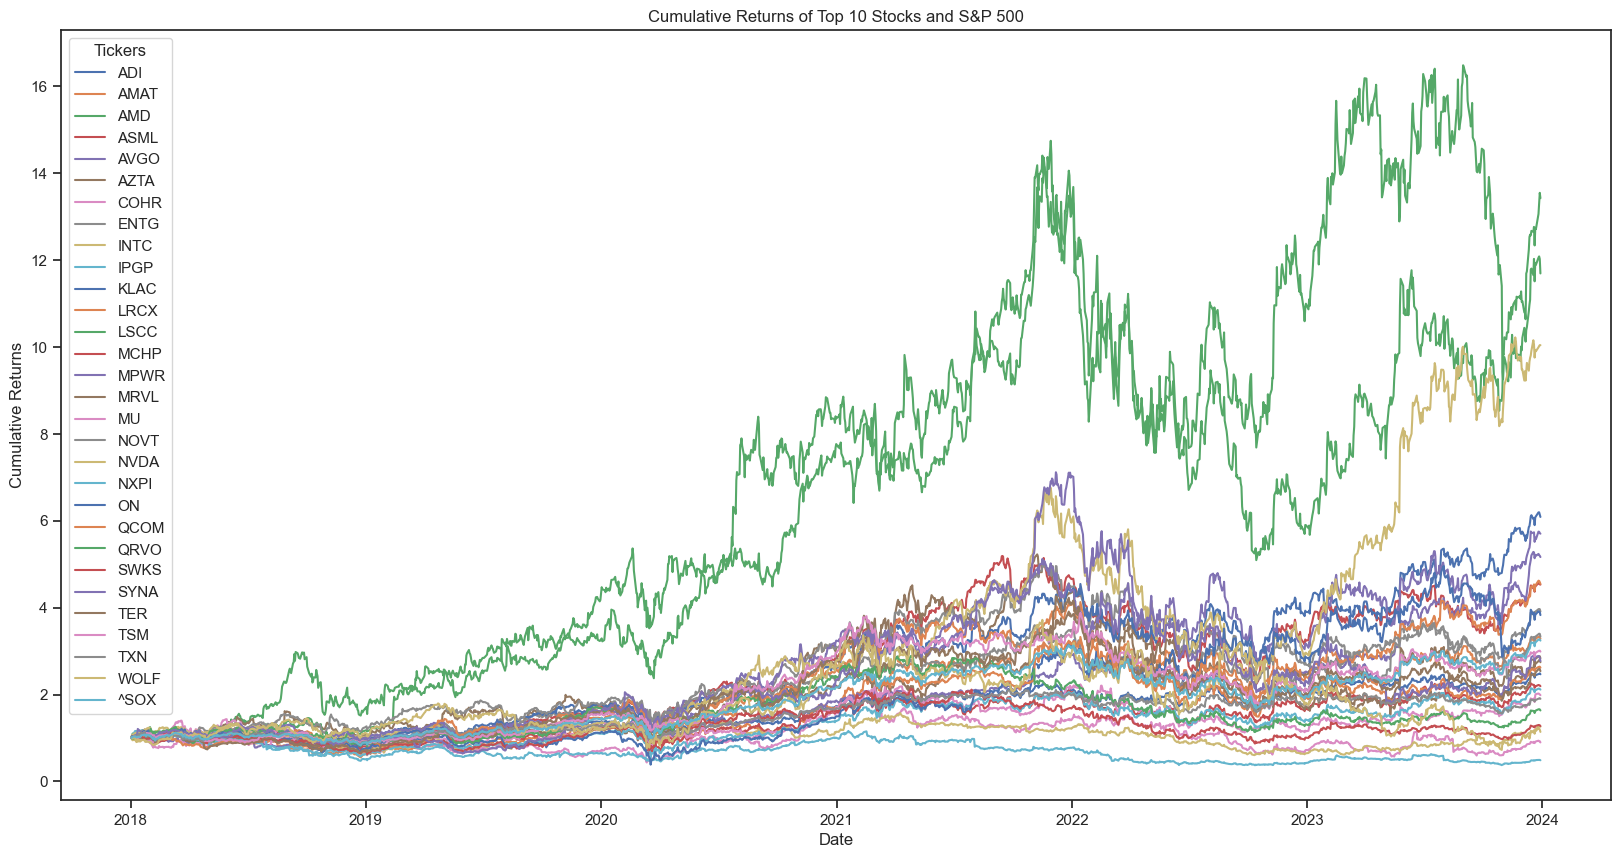

In [7]:
# Plotting the evolution
# Setting the seaborn style
sns.set(style="ticks")
# Plotting the evolution using seaborn's lineplot
plt.figure(figsize=(20, 10))
for column in cumulative_returns.columns:
    sns.lineplot(data=cumulative_returns[column], label=column)

plt.title("Cumulative Returns of Top 10 Stocks and S&P 500")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(title="Tickers")
plt.show()


<Axes: title={'center': 'Correlation Matrix'}, xlabel='Ticker', ylabel='Ticker'>

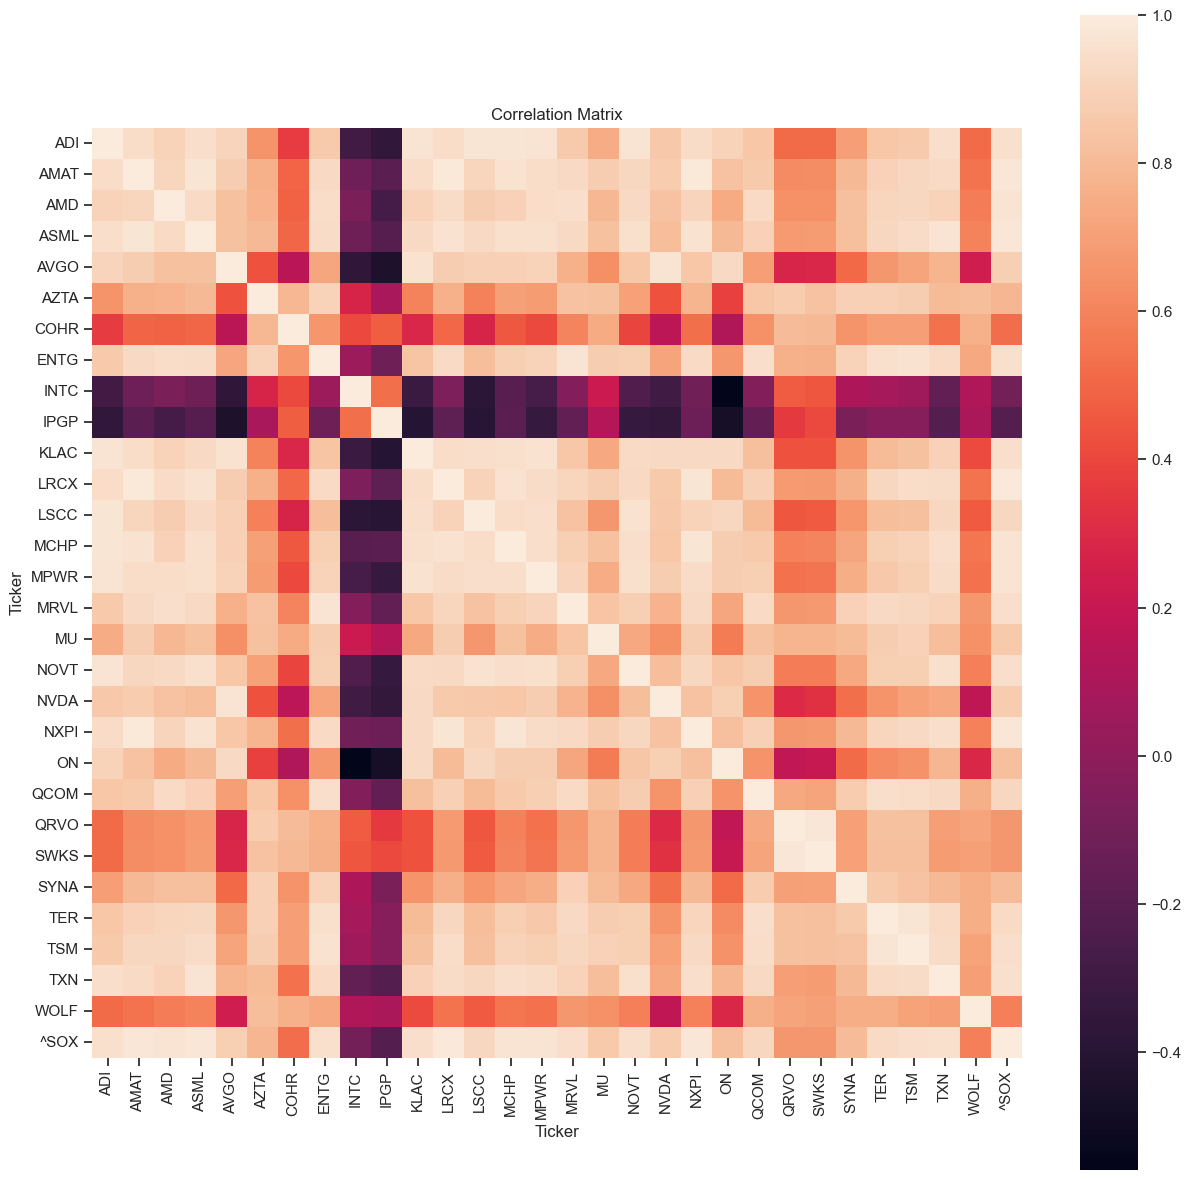

In [8]:
# correlation
correlation = prices.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=False)

# Market Cap Selection

In [9]:
# Define the list of tickers
tickers = ['AMD', 'ADI', 'AMAT', 'ASML', 'AZTA', 'AVGO', 'COHR', 'ENTG', 'INTC',
           'IPGP', 'KLAC', 'LRCX', 'LSCC', 'MRVL', 'MCHP', 'MU', 'MPWR', 'NOVT', 'NVDA',
           'NXPI', 'ON', 'QRVO', 'QCOM', 'SWKS', 'SYNA', 'TSM', 'TER', 'TXN', 'WOLF']

# Initialize an empty list to store data
market_caps = []

# Collect the market capitalization for each ticker
for ticker in tickers:
    stock = yf.Ticker(ticker)
    market_cap = stock.info.get('marketCap')
    market_caps.append({'Ticker': ticker, 'Market Cap': market_cap})

# Convert the list to a DataFrame
market_caps_df = pd.DataFrame(market_caps)

# Sort the companies by market capitalization in descending order
market_caps_df.sort_values(by='Market Cap', ascending=False, inplace=True)

# Reset the index for ranking
market_caps_df.reset_index(drop=True, inplace=True)

# Display the top entries
market_caps_df.head()

,Ticker,Market Cap
0,NVDA,1905000054784
1,TSM,662381199360
2,AVGO,558287880192
3,ASML,353750581248
4,AMD,236990775296


In [10]:
list(market_caps_df.Ticker[0:10])

['NVDA', 'TSM', 'AVGO', 'ASML', 'AMD', 'QCOM', 'AMAT', 'INTC', 'TXN', 'MU']



# Gradient Descent Optimization

#### Objective function

The objective function is defined by :
\begin{equation}
f(W) = (R_i - R_xW)^T(R_i - R_xW) - k(W^TW)
\end{equation}
where $R_i$ and $R_x$ are known matrices, $W$ is the variable matrix, and $k$ is a scalar and $k(W^TW)$ is the regularized term

#### Gradient of the function

The gradient of $f(W)$ with respect to $W$ is calculated as follows:

\begin{align}
\nabla f(W) &= -2R_x^T(R_i - R_xW) - 2kW
\end{align}

#### Gradient descent algorithm

The algorithm for minimizing $f(W)$ is shown below:

**Algorithm: Gradient descent to minimize $f(W)$**

1. **Set** $W$ to an arbitrary value.
2. Choose a learning rate $\alpha$ and a convergence threshold $\epsilon$.
3. **Repeat** :
   - Calculate the gradient $\nabla f(W)$.
   - Update $W \leftarrow W - \alpha \nabla f(W)$.
4. **Until** the norm of $\nabla f(W)$ is less than $\epsilon$.


In [39]:
np.random.seed(101) 
class GradientDescentOptimizer:
    def __init__(self, R_i, R_x, alpha=0.01, epsilon=1e-6, max_iter=10000):
        self.R_i = R_i  # Return vector for asset/portfolio i (n, 1)
        self.R_x = R_x  # Matrix of explanatory variables/factors (n, k)
        self.alpha = alpha  # Learning rate
        self.epsilon = epsilon  # Convergence threshold
        self.max_iter = max_iter  # Maximum number of iterations

    def calculate_gradient(self, W, k):
        # Calculate the gradient of the cost function
        predictions = np.dot(self.R_x, W)
        error = self.R_i - predictions
        gradient = -2 * np.dot(self.R_x.T, error) + 2 * k * W
        return gradient

    def cost_function(self, W, k):
        # Calculate the cost function including the regularization term
        predictions = np.dot(self.R_x, W)
        error = self.R_i - predictions
        cost = np.dot(error.T, error) + k * np.dot(W.T, W)
        return cost.item()

    def optimize_W_for_k(self, k):
        W = np.random.randn(self.R_x.shape[1], 1)  # Initialize W as a vector (k, 1)
        for _ in range(self.max_iter):
            gradient = self.calculate_gradient(W, k)
            W -= self.alpha * gradient
            if np.linalg.norm(gradient) < self.epsilon:
                break
        return W, self.cost_function(W, k)

    def find_best_k(self, k_values):
        min_cost = np.inf
        best_k = None
        best_W = None
        for k in k_values:
            W, cost = self.optimize_W_for_k(k)
            if cost < min_cost:
                min_cost = cost
                best_k = k
                best_W = W
        return best_k, best_W, min_cost

In [40]:
np.random.seed(101)

class StochasticGradientDescentOptimizer:
    def __init__(self, R_i, R_x, alpha=0.01, epsilon=1e-6, max_iter=10000, batch_size=50):
        self.R_i = R_i  
        self.R_x = R_x  
        self.alpha = alpha  
        self.epsilon = epsilon  
        self.max_iter = max_iter  
        self.batch_size = batch_size  # Size of the mini-batch

    def calculate_gradient(self, W, k, indices):
        # Calculate the gradient of the cost function for a mini-batch
        predictions = np.dot(self.R_x[indices], W)
        error = self.R_i[indices] - predictions
        gradient = -2 * np.dot(self.R_x[indices].T, error) + 2 * k * W
        return gradient

    def cost_function(self, W, k, indices):
        # Calculate the cost function including the regularization term for a mini-batch
        predictions = np.dot(self.R_x[indices], W)
        error = self.R_i[indices] - predictions
        cost = np.dot(error.T, error) + k * np.dot(W.T, W)
        return cost.item()

    def optimize_W_for_k(self, k):
        W = np.random.randn(self.R_x.shape[1], 1)  # Initialize W as a vector (k, 1)
        n_samples = self.R_i.shape[0]
        for _ in range(self.max_iter):
            indices = np.random.choice(n_samples, self.batch_size, replace=False)  # Randomly pick indices for the batch
            gradient = self.calculate_gradient(W, k, indices)
            W -= self.alpha * gradient
            if np.linalg.norm(gradient) < self.epsilon:
                break
        return W, self.cost_function(W, k, indices)

    def find_best_k(self, k_values):
        min_cost = np.inf
        best_k = None
        best_W = None
        for k in k_values:
            W, cost = self.optimize_W_for_k(k)
            if cost < min_cost:
                min_cost = cost
                best_k = k
                best_W = W
        return best_k, best_W, min_cost



## Tracking Problem resolution 

### Gradient Descente

#### Tracking Using all stocks

In [41]:
#df of return
df=prices.pct_change().iloc[1:]

#Split data into train and test
split_point = int(len(df) * 0.7)
train_data = df[:split_point]
test_data = df[split_point:]

#Optimization 
R_i = np.array(train_data[['^SOX']])  # Returns for asset/portfolio i (n, 1)
R_x = np.array(train_data.iloc[:,:29])  # Explanatory variables/factors (n, k)
optimizer = GradientDescentOptimizer(R_i, R_x)
k_values = np.linspace(0.01, 1, 100)  # k values to test
GD_best_k, GD_best_W_full, GD_min_cost = optimizer.find_best_k(k_values)

#Best Parameters
print("Best k:", GD_best_k)
print("Optimized W:")
print(GD_best_W_full*100)
print("Minimum cost:", GD_min_cost)

Best k: 0.01
Optimized W:
[[ 4.09365754e+00]
 [ 4.40562525e+00]
 [ 4.51895469e+00]
 [ 3.06514290e+00]
 [ 6.99756067e+00]
 [ 4.12504870e-01]
 [-5.04670590e-03]
 [ 2.00939204e+00]
 [ 7.99913013e+00]
 [ 5.18382266e-01]
 [ 4.05187039e+00]
 [ 4.07045615e+00]
 [ 2.57243230e-01]
 [ 4.53594578e+00]
 [ 2.74307183e+00]
 [ 3.47671258e+00]
 [ 3.68110556e+00]
 [ 2.69199101e-01]
 [ 7.91922511e+00]
 [ 2.24843461e+00]
 [ 1.56874843e+00]
 [ 8.48713796e+00]
 [ 2.15160424e+00]
 [ 2.77058280e+00]
 [ 1.77923294e-01]
 [ 2.37076384e+00]
 [ 4.97519481e+00]
 [ 8.80272484e+00]
 [ 1.01292414e+00]]
Minimum cost: 0.0016203275064534221


In [42]:
GD_best_W_full.sum()

0.9958617236820795

#### Tracking with Market Cap Selection 

In [43]:
#df of return
df=prices[list(market_caps_df.Ticker[0:10])].pct_change().iloc[1:]

#Split data into train and test
split_point = int(len(df) * 0.7)
train_data = df[:split_point]
test_data = df[split_point:]

#Optimization 
R_i = np.array(prices[['^SOX']].pct_change().iloc[1:][:split_point])  # Returns for asset/portfolio i (n, 1)
R_x = np.array(train_data.iloc[:,:len(df.columns)])  # Explanatory variables/factors (n, k)
optimizer = GradientDescentOptimizer(R_i, R_x)
k_values = np.linspace(0.01, 1, 100)  # k values to test
GD_best_k, GD_best_W_MC, GD_min_cost = optimizer.find_best_k(k_values)

In [44]:
#Best Parameters
print("Best k:", GD_best_W_MC)
print("Optimized W:")
print(GD_best_W_MC*100)
print("Minimum cost:", GD_min_cost)

Best k: [[0.09183265]
 [0.07287931]
 [0.11619887]
 [0.08616342]
 [0.05384327]
 [0.10759044]
 [0.1309663 ]
 [0.08611102]
 [0.1925625 ]
 [0.07643261]]
Optimized W:
[[ 9.18326541]
 [ 7.28793082]
 [11.61988746]
 [ 8.6163424 ]
 [ 5.38432657]
 [10.75904387]
 [13.09663005]
 [ 8.61110177]
 [19.25624983]
 [ 7.64326064]]
Minimum cost: 0.00932960954014845


### Stochastic Gradient Descente

#### Tracking Using all stocks

In [45]:
#df of return
df=prices.pct_change().iloc[1:]

#Split data into train and test
split_point = int(len(df) * 0.7)
train_data = df[:split_point]
test_data = df[split_point:]

#Optimization 
R_i = np.array(train_data[['^SOX']])  # Returns for asset/portfolio i (n, 1)
R_x = np.array(train_data.iloc[:,:29])  # Explanatory variables/factors (n, k)
optimizer = StochasticGradientDescentOptimizer(R_i, R_x, alpha=0.01, epsilon=1e-6, max_iter=1000, batch_size=100)
k_values = np.linspace(0.01, 1, 100)  # k values to test
SGD_best_k, SGD_best_W_full, SGD_min_cost = optimizer.find_best_k(k_values)

#Best Parameters
print("Best k:", SGD_best_k)
print("Optimized W:")
print(SGD_best_W_full*100)
print("Minimum cost:", SGD_min_cost)

Best k: 0.18000000000000002
Optimized W:
[[ 2.20701185]
 [ 3.32417385]
 [ 4.45087898]
 [ 4.12924186]
 [ 3.18316064]
 [ 2.47904095]
 [ 3.26513086]
 [ 1.22540713]
 [ 5.29522564]
 [-0.58813235]
 [ 2.20072974]
 [ 3.12557367]
 [ 1.49960392]
 [ 5.15507845]
 [ 5.09112032]
 [ 1.04085689]
 [ 3.65163311]
 [ 0.28019929]
 [ 2.65615928]
 [-0.87553853]
 [ 4.28102281]
 [ 4.68205846]
 [ 3.00880308]
 [ 2.13386687]
 [ 2.71979396]
 [ 3.47746718]
 [ 5.13507452]
 [ 4.84686429]
 [ 2.53561143]]
Minimum cost: 0.006871009036003822


In [46]:
SGD_best_W_full.sum()

0.8561711812549151

#### Tracking with Market Cap Selection 

In [47]:
#df of return
df=prices[list(market_caps_df.Ticker[0:10])].pct_change().iloc[1:]

#Split data into train and test
split_point = int(len(df) * 0.7)
train_data = df[:split_point]
test_data = df[split_point:]

#Optimization 
R_i = np.array(prices[['^SOX']].pct_change().iloc[1:][:split_point])  # Returns for asset/portfolio i (n, 1)
R_x = np.array(train_data.iloc[:,:len(df.columns)])  # Explanatory variables/factors (n, k)
optimizer = StochasticGradientDescentOptimizer(R_i, R_x, alpha=0.01, epsilon=1e-6, max_iter=1000, batch_size=100)
k_values = np.linspace(0.01, 1, 100)  # k values to test
SGD_best_k, SGD_best_W_MC, SGD_min_cost = optimizer.find_best_k(k_values)

In [48]:
#Best Parameters
print("Best k:", SGD_best_W_MC)
print("Optimized W:")
print(SGD_best_W_MC*100)
print("Minimum cost:", SGD_min_cost)

Best k: [[0.08364781]
 [0.05820835]
 [0.07525331]
 [0.04889034]
 [0.06415384]
 [0.08321223]
 [0.10621043]
 [0.07990117]
 [0.07912416]
 [0.05554724]]
Optimized W:
[[ 8.36478134]
 [ 5.82083488]
 [ 7.52533081]
 [ 4.88903449]
 [ 6.41538401]
 [ 8.32122321]
 [10.62104259]
 [ 7.99011742]
 [ 7.91241631]
 [ 5.55472355]]
Minimum cost: 0.012272333315703501


# Results

#### Evolution of returns 

#### Evolution of cumulative return Train Period 

In [49]:
# Calcul du Benchmark
Index = prices[:split_point]['^SOX'] / prices[:split_point]['^SOX'].iloc[0]

# Calcul des rendements quotidiens des actifs dans le portefeuille
daily_returns_full = prices.pct_change().iloc[1:][:split_point].drop(columns=['^SOX'])
daily_returns_MC = prices[list(market_caps_df.Ticker[0:10])].pct_change().iloc[1:][:split_point]

# Poids des actifs dans le portefeuille
GD_weights_full = [item[0] for item in GD_best_W_full.tolist()]
GD_weights_MC = [item[0] for item in GD_best_W_MC.tolist()]
SGD_weights_full = [item[0] for item in SGD_best_W_full.tolist()]
SGD_weights_MC = [item[0] for item in SGD_best_W_MC.tolist()]

# Calcul des rendements pondérés du portefeuille
GD_Tracking_portfolio_full = (daily_returns_full * GD_weights_full).sum(axis=1)
GD_Tracking_portfolio_MC = (daily_returns_MC * GD_weights_MC).sum(axis=1)
SGD_Tracking_portfolio_full = (daily_returns_full * SGD_weights_full).sum(axis=1)
SGD_Tracking_portfolio_MC = (daily_returns_MC * SGD_weights_MC).sum(axis=1)

# Calcul des rendements cumulés du portefeuille
GD_cumulative_return_full = (1 + GD_Tracking_portfolio_full).cumprod()
GD_cumulative_return_MC = (1 + GD_Tracking_portfolio_MC).cumprod()
SGD_cumulative_return_full = (1 + SGD_Tracking_portfolio_full).cumprod()
SGD_cumulative_return_MC = (1 + SGD_Tracking_portfolio_MC).cumprod()

# Création du DataFrame
results_df = pd.DataFrame({
    'SOX': Index,
    'GD Tracking Portfolio Full': GD_cumulative_return_full,
    'GD Tracking Portfolio Market Cap': GD_cumulative_return_MC,
    'SGD Tracking Portfolio Full': SGD_cumulative_return_full,
    'SGD Tracking Portfolio Market Cap': SGD_cumulative_return_MC
})

results_df=results_df.dropna()

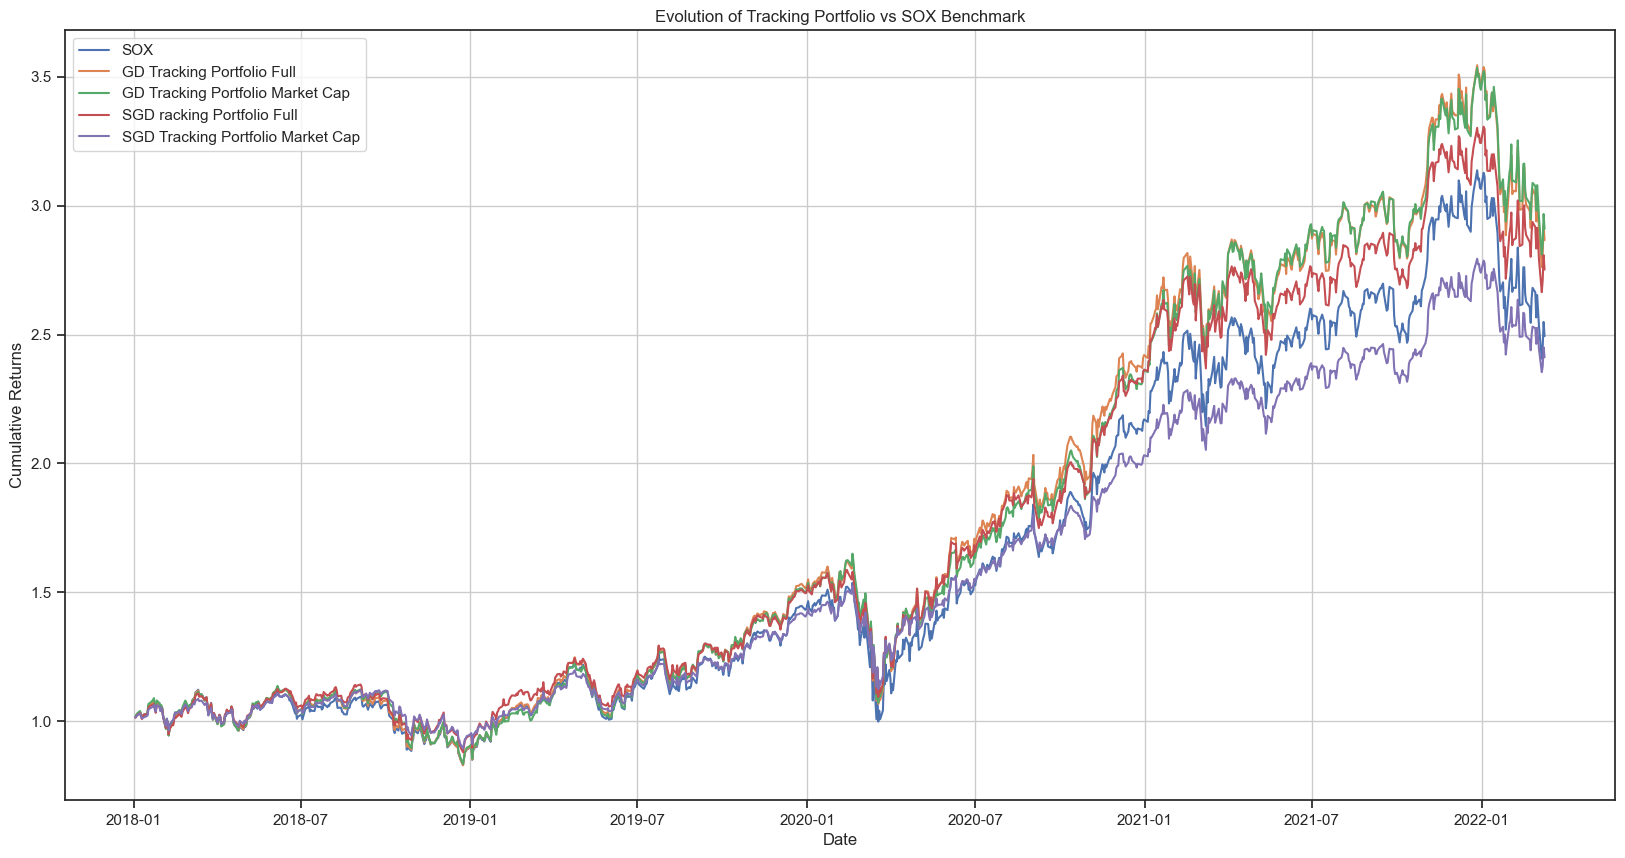

In [50]:
plt.figure(figsize=(20, 10))
plt.plot(results_df['SOX'], label='SOX')
plt.plot(results_df['GD Tracking Portfolio Full'], label='GD Tracking Portfolio Full')
plt.plot(results_df['GD Tracking Portfolio Market Cap'], label='GD Tracking Portfolio Market Cap')
plt.plot(results_df['SGD Tracking Portfolio Full'], label='SGD racking Portfolio Full')
plt.plot(results_df['SGD Tracking Portfolio Market Cap'], label='SGD Tracking Portfolio Market Cap')

plt.title('Evolution of Tracking Portfolio vs SOX Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig("result_train.png")
plt.show()

#### Evolution of cumulative return Test Period 

In [51]:
# Calcul du Benchmark
Index = prices[split_point:]['^SOX'] / prices[split_point:]['^SOX'].iloc[0]

# Calcul des rendements quotidiens des actifs dans le portefeuille
daily_returns_full = prices.pct_change().iloc[1:][split_point:].drop(columns=['^SOX'])
daily_returns_MC = prices[list(market_caps_df.Ticker[0:10])].pct_change().iloc[1:][split_point:]

# Calcul des rendements pondérés du portefeuille
GD_Tracking_portfolio_full = (daily_returns_full * GD_weights_full).sum(axis=1)
GD_Tracking_portfolio_MC = (daily_returns_MC * GD_weights_MC).sum(axis=1)
SGD_Tracking_portfolio_full = (daily_returns_full * SGD_weights_full).sum(axis=1)
SGD_Tracking_portfolio_MC = (daily_returns_MC * SGD_weights_MC).sum(axis=1)

# Calcul des rendements cumulés du portefeuille
GD_cumulative_return_full = (1 + GD_Tracking_portfolio_full).cumprod()
GD_cumulative_return_MC = (1 + GD_Tracking_portfolio_MC).cumprod()
SGD_cumulative_return_full = (1 + SGD_Tracking_portfolio_full).cumprod()
SGD_cumulative_return_MC = (1 + SGD_Tracking_portfolio_MC).cumprod()

# Création du DataFrame
results_df = pd.DataFrame({
    'SOX': Index,
    'GD Tracking Portfolio Full': GD_cumulative_return_full,
    'GD Tracking Portfolio Market Cap': GD_cumulative_return_MC,
    'SGD Tracking Portfolio Full': SGD_cumulative_return_full,
    'SGD Tracking Portfolio Market Cap': SGD_cumulative_return_MC
})

results_df=results_df.dropna()

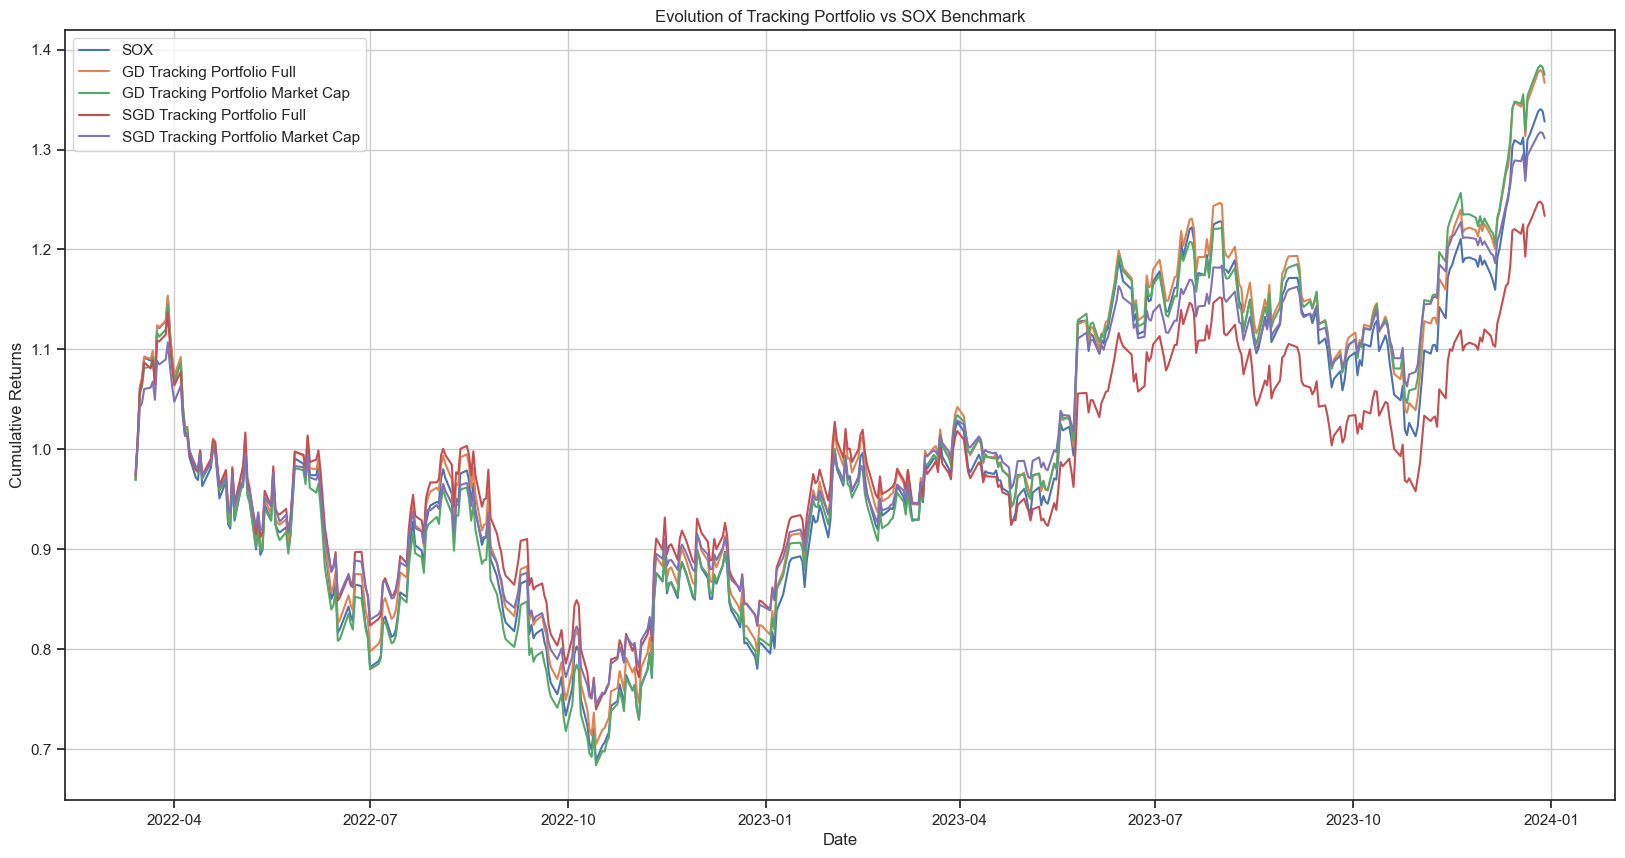

In [52]:
plt.figure(figsize=(20, 10))
plt.plot(results_df['SOX'], label='SOX')
plt.plot(results_df['GD Tracking Portfolio Full'], label='GD Tracking Portfolio Full')
plt.plot(results_df['GD Tracking Portfolio Market Cap'], label='GD Tracking Portfolio Market Cap')
plt.plot(results_df['SGD Tracking Portfolio Full'], label='SGD Tracking Portfolio Full')
plt.plot(results_df['SGD Tracking Portfolio Market Cap'], label='SGD Tracking Portfolio Market Cap')

plt.title('Evolution of Tracking Portfolio vs SOX Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig("result_test.png")
plt.show()